In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
np.random.seed(0)

X, y = make_blobs(
    n_samples=600,
    centers=[[-3,-3],[0,4],[4,-4]],
    n_features=2,
    random_state=42
)

Y = np.eye(3)[y]

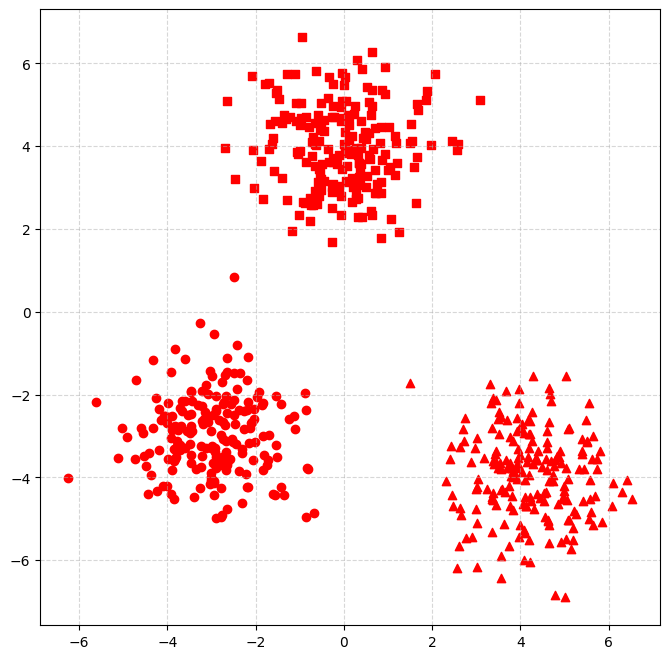

In [32]:
markers = ['o', 's', '^', 'D', 'v', 'P', '*', 'X', '<', '>']

plt.figure(figsize=(8, 8))
classes = np.unique(y)

for idx, cls in enumerate(classes):
    plt.scatter(
        X[y == cls, 0], X[y == cls, 1],
        c='red',
        marker=markers[idx % len(markers)],

    )

plt
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()



In [20]:
import numpy as np

class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons1 = 8
        hiddenLayerNeurons2 = 6
        outLayerNeurons = 3

        self.learning_rate = 0.0002
        self.W_HI   = np.random.randn(inputLayerNeurons, hiddenLayerNeurons1)
        self.W_H1H2 = np.random.randn(hiddenLayerNeurons1, hiddenLayerNeurons2)
        self.W_OH   = np.random.randn(hiddenLayerNeurons2, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        X = np.array(X, ndmin=2)
        self.h1 = self.sigmoid(np.dot(X, self.W_HI))
        self.h2 = self.sigmoid(np.dot(self.h1, self.W_H1H2))
        pred = self.sigmoid(np.dot(self.h2, self.W_OH))
        return pred

    def backPropagation(self, X, Y, pred):
        X = np.array(X, ndmin=2)
        Y = np.array(Y, ndmin=2)


        out_err   = Y - pred
        out_delta = self.learning_rate * out_err * self.sigmoid(pred, der=True)


        h2_err   = np.dot(out_delta, self.W_OH.T)
        h2_delta = self.learning_rate * h2_err * self.sigmoid(self.h2, der=True)


        h1_err   = np.dot(h2_delta, self.W_H1H2.T)
        h1_delta = self.learning_rate * h1_err * self.sigmoid(self.h1, der=True)


        self.W_OH   += np.dot(self.h2.T, out_delta)
        self.W_H1H2 += np.dot(self.h1.T, h2_delta)
        self.W_HI   += np.dot(X.T, h1_delta)

    def train(self, X, Y):
        pred = self.feedForward(X)
        self.backPropagation(X, Y, pred)


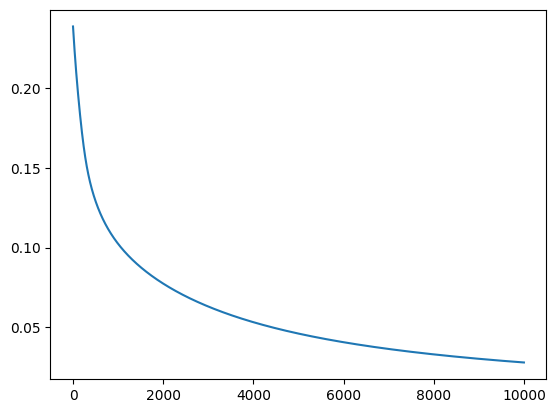

In [21]:

NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)

In [5]:
print(NN.feedForward([0,0]))

[[0.32396535 0.33119952 0.44135175]]


In [6]:

print(NN.feedForward([0,1]))

[[0.24902105 0.41289684 0.46348543]]


In [25]:
print(NN.feedForward([1,0]))

[[0.18632921 0.04516275 0.62299243]]


In [26]:
print(NN.feedForward([1,1]))

[[0.17901979 0.14679774 0.35449307]]
